In [48]:
#from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import Series

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

In [49]:
train = '../data/train.csv'
test = '../data/test.csv'
index_col = 'Id'

data = pd.read_csv(train,index_col = index_col )
evaluate = pd.read_csv(test,index_col = index_col )
data.sort_index(inplace = True)
evaluate.sort_index(inplace = True)



print(data.shape) #(R,C)

print(evaluate.shape) #(R,C)

(2051, 80)
(879, 79)


In [50]:
#remove some outliers
data = data.drop([1499]) #Expensive house because of large lot areav

In [51]:
#Sum columns for total SQFT
data['Total_sqft']= data[['1st Flr SF','2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2','Gr Liv Area','Garage Area','Total Bsmt SF']].sum(axis =1)
evaluate['Total_sqft']= evaluate[['1st Flr SF','2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2','Gr Liv Area','Garage Area','Total Bsmt SF']].sum(axis =1)

#normalize years but subtracting from 2019
data['Age_Build'] = 2019 - data['Year Built']
data['Age_Remodel'] = 2019 - data['Year Remod/Add']

evaluate['Age_Build'] = 2019 - evaluate['Year Built']
evaluate['Age_Remodel'] = 2019 - evaluate['Year Remod/Add']


#Dummy Variables
categorical_features = ['Overall Qual','Overall Cond','Exter Qual']
data = pd.get_dummies(data=data, columns = categorical_features)
evaluate = pd.get_dummies(data=evaluate, columns = categorical_features)

In [52]:
data['Garage Cars'].fillna(value=0,inplace = True)
evaluate['Garage Cars'].fillna(value=0,inplace = True)

In [53]:
#Maybe convert the int's to float? warning later when preprocessing data
final = ['float64']
other =['uint8','int16', 'int32', 'int64', 'float16', 'float32']

D_to_convert = data.select_dtypes(include=other).columns
E_to_convert = evaluate.select_dtypes(include=other).columns


for i in D_to_convert:
    data[i] = data[i].astype('float64')
    
for i in E_to_convert:
    evaluate[i] = evaluate[i].astype('float64')

In [54]:
features = ['Total_sqft',
            'Age_Build',
            'Age_Remodel',
            #'Year Built',
            #'Year Remod/Add',
            'Lot Area',
            'TotRms AbvGrd',
            'Garage Cars',
            'Full Bath',
            #'Overall Qual_1',
            #'Overall Qual_2',
            #'Overall Qual_3',
            #'Overall Qual_4',
            'Overall Qual_5',
            'Overall Qual_6',
            'Overall Qual_7',
            'Overall Qual_8',
            'Overall Qual_9',
            'Overall Qual_10',
            #'Overall Cond_1',
            #'Overall Cond_2',
            #'Overall Cond_3',
            #'Overall Cond_4',
            'Overall Cond_5',
            'Overall Cond_6',
            'Overall Cond_7',
            'Overall Cond_8',
            'Overall Cond_9',
            #'Overall Cond_10',            
            'Exter Qual_Ex',
            #'Exter Qual_Fa',
            #'Exter Qual_Gd',
            'Exter Qual_TA',
            #'BsmtFin Type 1_GLQ'
           ]



X = data[features]
y = data['SalePrice']
X_eval = evaluate[features]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state= 23)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1537, 20)
(1537,)
(513, 20)
(513,)


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns = features)
X_test = pd.DataFrame(X_test,columns = features)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1538, 20)
(1538,)
(513, 20)
(513,)


In [56]:
#model = Ridge(alpha=.05, normalize = True)
model = Lasso(alpha=.3, normalize = True)
#model = LinearRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

The coefficient for Total_sqft is 19.30867188657152
The coefficient for Age_Build is -368.8701667084507
The coefficient for Age_Remodel is -165.6481030169964
The coefficient for Lot Area is 1.1296128052621757
The coefficient for TotRms AbvGrd is 1953.5487962854281
The coefficient for Garage Cars is 3056.066898034857
The coefficient for Full Bath is 2455.00262221238
The coefficient for Overall Qual_5 is 2232.9471497561403
The coefficient for Overall Qual_6 is 11655.37639202674
The coefficient for Overall Qual_7 is 26975.12019358145
The coefficient for Overall Qual_8 is 62560.996921660335
The coefficient for Overall Qual_9 is 119469.68400912783
The coefficient for Overall Qual_10 is 123345.14076482443
The coefficient for Overall Cond_5 is 18641.068542296027
The coefficient for Overall Cond_6 is 24696.564602222854
The coefficient for Overall Cond_7 is 34850.65485039893
The coefficient for Overall Cond_8 is 36706.41921887636
The coefficient for Overall Cond_9 is 36401.883740433026
The coef

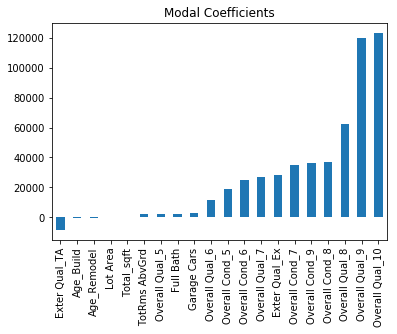

In [57]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = Series(model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
    ;

In [58]:

print("R-squared = ", model.score(X_test, y_test))  

print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared =  0.9024154966421871
RMSE =  25652.1590414882


In [47]:
#hapy with results train the model on the full data set and out put eval predictions
lasso = Lasso(alpha=.3, normalize = True)
lasso.fit(X, y)
y_pred_eval = lasso.predict(X_eval)

y_pred_eval= pd.DataFrame(y_pred_eval,index=X_eval.index)
y_pred_eval.rename(columns={y_pred_eval.columns[0]:'SalePrice'}, inplace=True)
y_pred_eval.to_csv('../results/Lasso_A.csv')

